/var/folders/6z/w7qyc8h96b92v7zs458_gfj40000gp/T/ipykernel_88346/3938858189.py:12: RankWarning:

Polyfit may be poorly conditioned



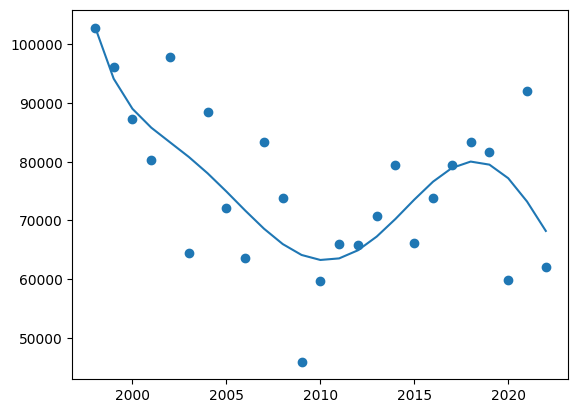

[  256.375  1912.25   1787.     5493.5   14479.125 16427.375 10436.
  2854.625  8112.375 14807.125  7800.25  18322.25   3610.55   2486.5
   863.1    3583.7    9263.7    7348.75   2842.925   545.375  3252.825
  2182.1   17372.95  18903.575  6069.25 ] errores absoluto

[0.00249426 0.01990787 0.02048725 0.06840539 0.14807859 0.25515082
 0.11797689 0.03961236 0.12762531 0.17756689 0.10575463 0.40019767
 0.06053683 0.03767025 0.01312448 0.05060172 0.11650299 0.11103431
 0.0385449  0.00686257 0.03906256 0.02671552 0.29047724 0.20520665
 0.09768788] errores relativo

88304665.64075 error cuadrático medio

9397.056222070292 raiz del error cuadrático medio

7240.5419999999995 error absoluto medio



In [162]:

from charts.graficas_plotly import miles_peso_
import matplotlib.pyplot as plt
import numpy as np 


años =[x for x in range(1998,2023)]
ann = [x for x in range(1998,2023)]
sumap1 = miles_peso_.T.loc['Pescado y marisco fresco y congelado']
sumap2 = miles_peso_.T.loc['Pescado y marisco en conserva']
valores = list(sumap1+sumap2)

l = np.polyfit(años,valores,len(valores)-1)
funcion = np.poly1d(l)
valores1 = funcion(ann)


plt.scatter(años,valores)
plt.plot(ann,valores1)

plt.show()

#errores
reales = np.array(valores)
aprox = np.array(valores1)

error_absoluto = np.abs(reales-aprox)
error_relativo  = error_absoluto/ np.abs(reales)
mse = np.mean((reales - aprox)**2)
rmse = np.sqrt(mse)
mae = np.mean(error_absoluto)




print(error_absoluto ,"errores absoluto\n")
print(error_relativo, 'errores relativo\n')
print(mse,'error cuadrático medio\n')
print(rmse,'raiz del error cuadrático medio\n')
print(mae,'error absoluto medio\n')

